In [1]:
import pandas as pd
import seaborn as sns

In [2]:
vgsales_df = pd.read_csv("databeatriz/fifaplayers_21.csv")

## First section

According to National Center for Biotechnology Information the age of the soccer players ranges from 16 to 43, with an average of 25.75 ± 4.14 years. 

In [3]:
vgsales_df['age'].shape #Sample Size

(18944,)

In [4]:
print(vgsales_df['age'].std()) # Sample std

4.69735446302051


In [5]:
# Mean sample
averagesample = vgsales_df["age"].mean()
print(averagesample)


25.22582347972973


In [6]:
from scipy import stats

In [7]:
from statsmodels.stats import weightstats

H0 : P  = 25.75 (Proportion has not changed)
H1 : P != 25.75 (Proportion has changed)
Two-tailed test

In [8]:
import scipy.stats as stats
from math import sqrt
x_bar = averagesample # sample mean 
n = 18944 # number of students
sigma = 4.14 # sd of population
mu = 25.75 # Population mean 

z = (x_bar - mu)/(sigma/sqrt(n))
z

-17.426616134150443

Text(0.5, 1.0, 'z-statistic = 1.96 and -1.96')

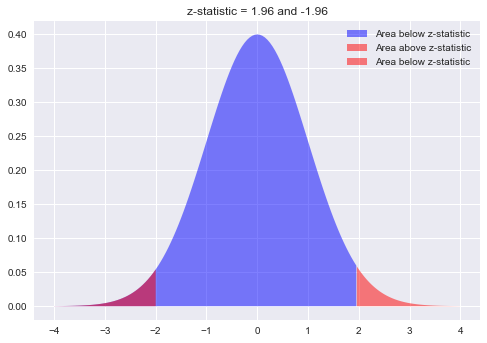

In [9]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.96,0.05),
                 y1= stats.norm.pdf(np.arange(-4,1.96,0.05)) ,
                 facecolor='blue',
                 alpha=0.5,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.96,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.96,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5, 
                 label= 'Area above z-statistic')

plt.fill_between(x=np.arange(-4,-1.96,0.05),
                 y1= stats.norm.pdf(np.arange(-4,-1.96,0.05)) ,
                 facecolor='red',
                 alpha=0.5,
                 label= 'Area below z-statistic'
                 )
plt.legend()
plt.title ('z-statistic = 1.96 and -1.96')

## Second and third section

In [10]:
def correlation_heatmap(dataset,l,w):
    correlation = dataset.corr()
    plt.figure(figsize=(l,w))
    sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')
    plt.title('Correlation between different fearures')
    plt.show()

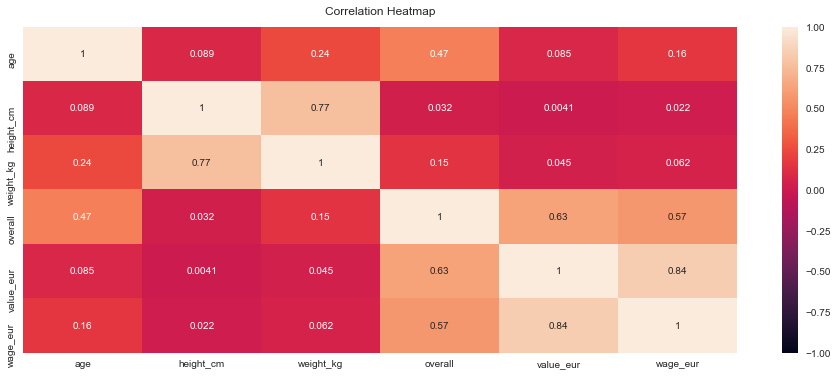

In [11]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(vgsales_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [12]:
pearson_coef, p_value = stats.pearsonr(vgsales_df['value_eur'], vgsales_df['overall'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.6300851207029854  with a P-value of P = 0.0


In [13]:
from sklearn.metrics import r2_score 

In [14]:
vgsales_df = vgsales_df[(vgsales_df['age'] == 23)]
vgsales_df

,Name,age,height_cm,weight_kg,nationality,club_name,overall,value_eur,wage_eur,preferred_foot
67,F. de Jong,23,180,74,Netherlands,FC Barcelona,85,50500000,190000,Right
101,Oyarzabal,23,181,79,Spain,Real Sociedad,84,42500000,47000,Left
103,Arthur,23,171,73,Brazil,Juventus,84,41000000,98000,Right
111,W. Ndidi,23,183,74,Nigeria,Leicester City,84,36500000,96000,Right
142,O. Dembélé,23,178,67,France,FC Barcelona,83,35500000,175000,Left
...,...,...,...,...,...,...,...,...,...,...
18881,Zhu Jiahao,23,178,71,China PR,Jiangsu Suning FC,49,40000,2000,Right
18921,Chen Kejiang,23,176,70,China PR,Chongqing Dangdai Lifan FC SWM Team,48,35000,1000,Right
18922,Guo Yunqi,23,175,68,China PR,Shijiazhuang Ever Bright F.C.,48,40000,1000,Right
18936,Zhong Jiyu,23,170,62,China PR,Shijiazhuang Ever Bright F.C.,47,45000,1000,Right


C:\Users\bia_l\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


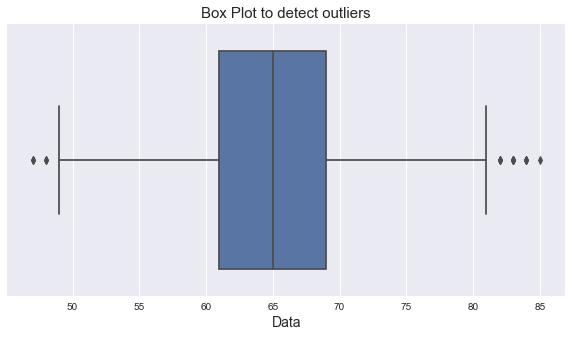

In [15]:
fig = plt.figure(figsize=(10,5))
sns.boxplot(vgsales_df["overall"])
plt.title('Box Plot to detect outliers', fontsize=15)
plt.xlabel('Data', fontsize=14)
plt.show()

In [16]:
Q1 = vgsales_df.quantile(0.25)
Q3 = vgsales_df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

age                0.0
height_cm         10.0
weight_kg          9.0
overall            8.0
value_eur    1050000.0
wage_eur        5000.0
dtype: float64


In [17]:
vgsales_df = vgsales_df[~((vgsales_df < (Q1-1.5 * IQR)) |(vgsales_df > (Q3 + 1.5 * IQR))).any(axis = 1)]

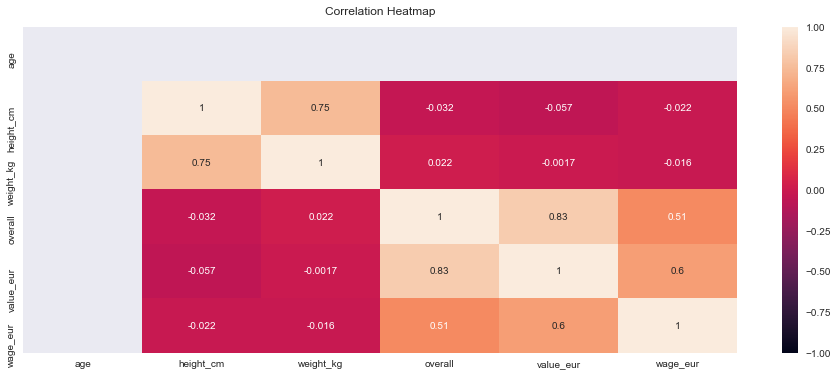

In [18]:
# Increase the size of the heatmap.
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1
heatmap = sns.heatmap(vgsales_df.corr(), vmin=-1, vmax=1, annot=True)

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap.
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

<AxesSubplot:xlabel='overall', ylabel='value_eur'>

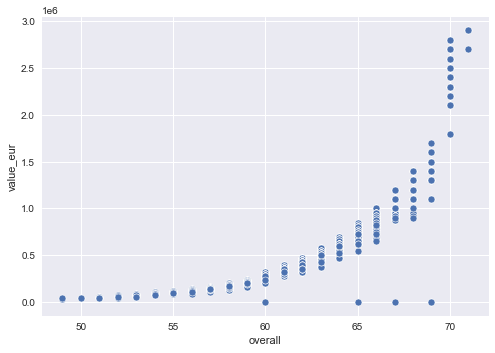

In [19]:
sns.scatterplot(data=vgsales_df, x="overall", y="value_eur")

In [20]:
average = vgsales_df["overall"].mean()
print(average)

63.0893470790378


In [21]:
average_value = vgsales_df["value_eur"].mean()
print(average_value)


683526.6323024055


In [22]:
import numpy as np

# best fit polynomials

# polynomial - players
play_fit = np.polyfit(vgsales_df.overall, vgsales_df.value_eur, 1)

play_fit

array([  103720.38408491, -5860124.67840189])

In [23]:
pearson_coef, p_value = stats.pearsonr(vgsales_df['value_eur'], vgsales_df['overall'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.8318278411617919  with a P-value of P = 2.2292594681540197e-299


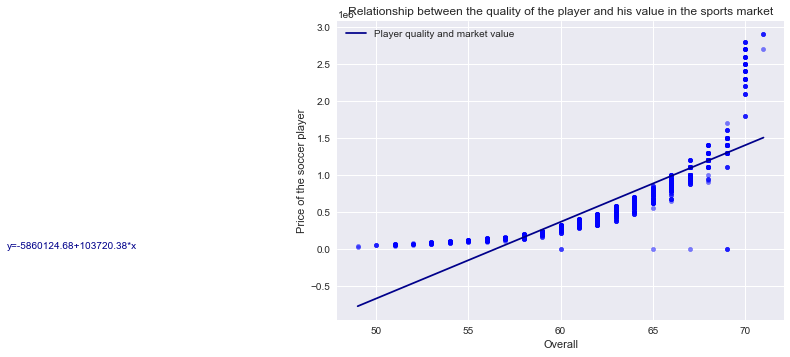

In [24]:
# scatter plots and regression lines

# Scatter plots.
ax1 = vgsales_df.plot(kind='scatter', x='overall', y='value_eur', color='blue', alpha=0.5)

# regression lines
plt.plot(vgsales_df.overall, play_fit[0] * vgsales_df.overall + play_fit[1], color='darkblue')

# regression equations
plt.text(30, 99,'y={:.2f}+{:.2f}*x'.format( play_fit[1],  play_fit[0]), color='darkblue')

# legend, title and labels.
plt.legend(labels=['Player quality and market value'])

plt.title('Relationship between the quality of the player and his value in the sports market')
plt.xlabel('Overall')
plt.ylabel('Price of the soccer player');

In [25]:
from sklearn.linear_model import LinearRegression


# create linear regression object
lr_play = LinearRegression()

# fit linear regression
lr_play.fit(vgsales_df[['overall']], vgsales_df['value_eur'])

# get the slope and intercept of the line best fit
print(lr_play.intercept_)

print(lr_play.coef_)

-5860124.678401886
[103720.38408491]


In [26]:
## Name of the player: Rodri TarÃ­n

# predictions using numpy
print(np.polyval(play_fit, [69]))

# predictions using scikit learn
print(lr_play.predict([[69]]))

[1296581.82345723]
[1296581.82345723]


C:\Users\bia_l\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
## Name of the player: J. Simpson

# predictions using numpy
print(np.polyval(play_fit, [66]))

# predictions using scikit learn
print(lr_play.predict([[66]]))

[985420.67120249]
[985420.67120248]


C:\Users\bia_l\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
## Name of the player: Henrique Trevisan

# predictions using numpy
print(np.polyval(play_fit, [63]))

# predictions using scikit learn
print(lr_play.predict([[63]]))

[674259.51894775]
[674259.51894774]


C:\Users\bia_l\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
## Name of the player: Pedro LÃ³pez

# predictions using numpy
print(np.polyval(play_fit, [61]))

# predictions using scikit learn
print(lr_play.predict([[61]]))

[466818.75077792]
[466818.75077791]


C:\Users\bia_l\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [30]:
actual_price = [1500000, 900000, 550000, 400000]
predicted_price = [1296581.82, 985420.67, 674259.51, 466818.75]
R_square = r2_score(actual_price,predicted_price) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9043336453429623
